In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


2022-11-05 22:13:25.520876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [3]:
train = train_datagen.flow_from_directory(directory = "/Users/milandutta/Documents/Magnolia Metrics/Projects/RiceSaver/BangladeshiCrops/Crop___Disease", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/Users/milandutta/Documents/Magnolia Metrics/Projects/RiceSaver/BangladeshiCrops/Crop___Disease", target_size = (256, 256), batch_size = 32)


Found 4078 images belonging to 1 classes.
Found 4078 images belonging to 1 classes.


In [4]:
t_img, label = train.next()

In [5]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
         plt.figure(figsize=(5,5))
         plt.imshow(im)
         plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


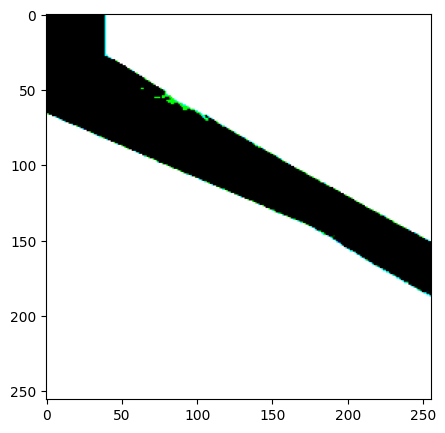

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


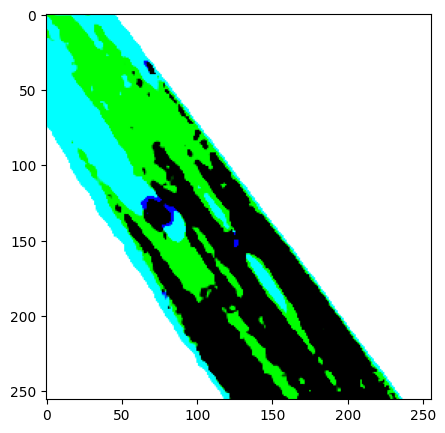

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


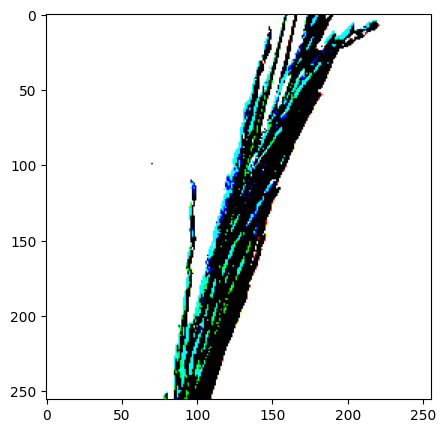

In [6]:
plotImage(t_img[:3], label[:3])

In [7]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [8]:
base_model = VGG19(input_shape = (256, 256, 3), include_top = False)


2022-11-05 22:13:37.930577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [11]:
x = Flatten()(base_model.output)

x = Dense(units = 38, activation= 'softmax')(x)

# Creating the model
model = Model(base_model.input, x)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor= 'val_accuraccy', min_delta= 0.01, patience= 3, verbose= 1)

# Model Checkpoint
mc = ModelCheckpoint(filepath= 'best_model.h5', monitor= 'val_accuraccy', min_delta= 0.01, patience= 3, verbose= 1, save_best_only= True)

cb = [es, mc]

In [15]:
his = model.fit_generator(train, steps_per_epoch= 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= val, validation_steps= 16)

/var/folders/pl/0l_sm2gn2r1c4r_4js1h2hpr0000gn/T/ipykernel_27024/708555172.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch= 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= val, validation_steps= 16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 456.4558 - accuracy: 0.0156

In [ ]:
# Load best model

from keras.models import load_model

model = load_model("/content/best_model.h5")

OSError: No file or directory found at /content/best_model.h5

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

/var/folders/pl/0l_sm2gn2r1c4r_4js1h2hpr0000gn/T/ipykernel_23465/3940226071.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


KeyboardInterrupt: 

In [ ]:
zip( list(train.class_indices.values(), list(train.class_indices.keys()) ) )

In [ ]:
def prediction(path):
    img = load_img(path, target_size=(256, 256))
    i = img_to_array(img)

    im = preprocess_input(i)

    img = np.expand_dims(im, axis = 0)

    pred = np.argmax(model.predict(img))

    print(pred)

In [ ]:
# Testing to see if the ML is working
path = "/Users/milandutta/Documents/Magnolia Metrics/Projects/RiceSaver/BangladeshiCrops/Crop___Disease/Rice/Rice___Healthy/IMG_2996.jpg"

prediction(path)

1/1 [==============================] - 0s 209ms/step
36


In [ ]:
train.class_indices

{'Rice': 0}